In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import skimage.io
import numpy as np
from tqdm import tqdm
import cv2
from glob import glob
import warnings
import random
from PIL import Image
from tensorflow.keras.utils import to_categorical

label_map = {'normal':1,
             'fibrosis':2,
             'tumor':3,
            }
def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
        
def read_nuclei(path):
    "Read raw data"

    # Load 4-channel image
    if len(path) == 0:
        return None
    
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img



def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
    
    
def convert(img_arr, mask_arr):
    img_arr.astype("float64")
    mask_arr.astype("float64")
    #img_arr = img_arr/255.0
    mask_arr = to_categorical(mask_arr, num_classes=4, dtype="float64")
    return img_arr, mask_arr
    
    
def visualize(**images):
    """Plot images in one row."""
    
    norm=plt.Normalize(0,3) # 4 classes including BG
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue"])

    
    n = len(images)
    plt.figure(figsize=(18, 16))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap=map_name, norm=norm)
    plt.show()
    
def uniq(**in_arrs):
    for name, arr in in_arrs.items():
        flat_arr = arr.flatten()
        print("Name: {}, Uniques: {}".format(name, np.unique(flat_arr)))
        

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Make new folders
DATA_DIR = os.path.join(ROOT_DIR, "testappend/")
IMAGES_DIR =  os.path.join(DATA_DIR, "images/")
MASKS_DIR = os.path.join(DATA_DIR, "masks/")

print(IMAGES_DIR)
print(MASKS_DIR)

/Users/johnshieh/Lab2020/unet/testappend/images/
/Users/johnshieh/Lab2020/unet/testappend/masks/


In [2]:
image_fns = sorted(next(os.walk(IMAGES_DIR))[2])
mask_fns = sorted(next(os.walk(MASKS_DIR))[2])
print(len(image_fns), len(mask_fns))
assert (len(image_fns) == len(mask_fns)), "different lengths!"

15 15


In [3]:
img0 = Image.open(os.path.join(IMAGES_DIR, image_fns[0]))
mask0 = Image.open(os.path.join(MASKS_DIR, mask_fns[0]))
print(type(mask0))
img0 = np.asarray(img0)
mask0 = np.asarray(mask0)
print(img0.shape, mask0.shape, type(img0))
uniq(mask=mask0)

img_cv, mask_cv = convert(img0, mask0)
print(img_cv.shape, img_cv.max(), mask_cv.shape, type(mask_cv), mask_cv.dtype, mask_cv.max())
uniq(arr2=mask_cv)

# imgcv = cv2.imread(os.path.join(IMAGES_DIR, image_fns[0]))
# maskcv = cv2.imread(os.path.join(MASKS_DIR, mask_fns[0]))
# print(type(imgcv), imgcv.shape)
# print(type(maskcv), maskcv.shape, "\n")

# print(imgcv.shape, maskcv.shape, type(maskcv), maskcv.dtype)
# img_cv, mask_cv = convert(imgcv, maskcv)
# print(img_cv.shape, mask_cv.shape, type(mask_cv), mask_cv.dtype, mask_cv.max())
# uniq(arr2=mask_cv)

<class 'PIL.PngImagePlugin.PngImageFile'>
(96, 96, 3) (96, 96) <class 'numpy.ndarray'>
Name: mask, Uniques: [0 1]
(96, 96, 3) 255 (96, 96, 4) <class 'numpy.ndarray'> float64 1.0
Name: arr2, Uniques: [0. 1.]


In [4]:
#make zero arrays
joined_imgs = np.zeros((len(image_fns), img_cv.shape[0], img_cv.shape[1], img_cv.shape[2])).astype(np.float64)
joined_masks = np.zeros((len(mask_fns), mask_cv.shape[0], mask_cv.shape[1], mask_cv.shape[2])).astype(np.float64)
print(joined_imgs.shape, joined_masks.shape, type(joined_masks))

(15, 96, 96, 3) (15, 96, 96, 4) <class 'numpy.ndarray'>


(96, 96, 3) (96, 96, 4) <class 'numpy.ndarray'>


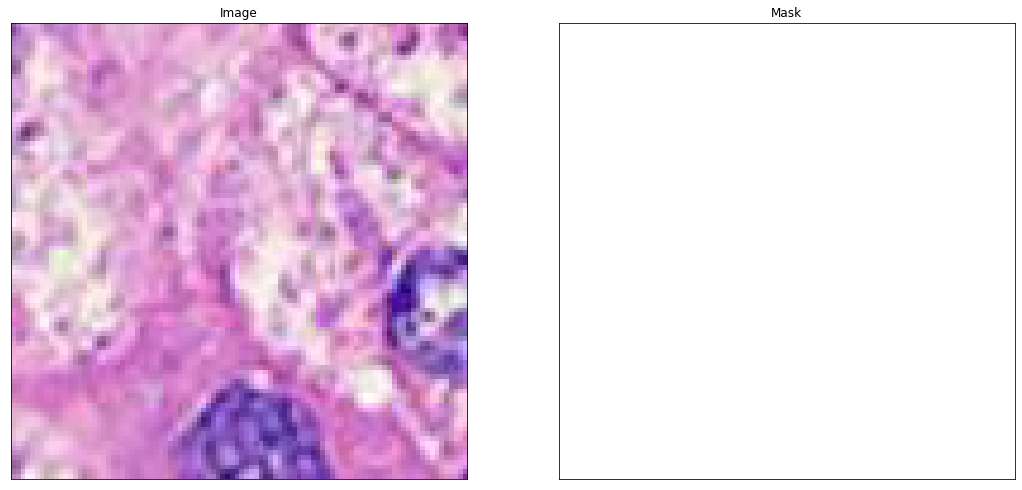

(96, 96, 3) (96, 96, 4) 0 255
(96, 96, 4) [0 1]
Name: mask, Uniques: [0 1]


In [5]:
print(img_cv.shape, mask_cv.shape, type(mask_cv))
imgcv_vis = Image.fromarray((img_cv).astype(np.uint8))
maskcv_vis = Image.fromarray((mask_cv).astype(np.uint8))
visualize(image=imgcv_vis, mask=maskcv_vis)
imgcvfrom = np.array(imgcv_vis)
maskcvfrom = np.array(maskcv_vis)
print(img_cv.shape, mask_cv.shape, img_cv.min(), img_cv.max())
print(maskcvfrom.shape, np.unique(maskcvfrom))
uniq(mask=maskcvfrom)

In [6]:
for idx in tqdm(range(len(image_fns))):
    img = None
    mask = None
#     img = cv2.imread(os.path.join(IMAGES_DIR, image_fns[idx]))
#     mask = cv2.imread(os.path.join(MASKS_DIR, mask_fns[idx]))
    img = Image.open(os.path.join(IMAGES_DIR, image_fns[idx]))
    mask = Image.open(os.path.join(MASKS_DIR, mask_fns[idx]))
    img = np.asarray(img)
    mask = np.asarray(mask)
    img, mask = convert(img, mask)
    joined_imgs[idx] = img
    joined_masks[idx] = mask
print(joined_imgs.shape, joined_masks.shape, joined_masks[0].shape, type(joined_masks[0]))

100%|██████████| 15/15 [00:00<00:00, 420.89it/s]

(15, 96, 96, 3) (15, 96, 96, 4) (96, 96, 4) <class 'numpy.ndarray'>


## testing

Name: mask, Uniques: [0. 1.]
Name: mask, Uniques: [0 1]


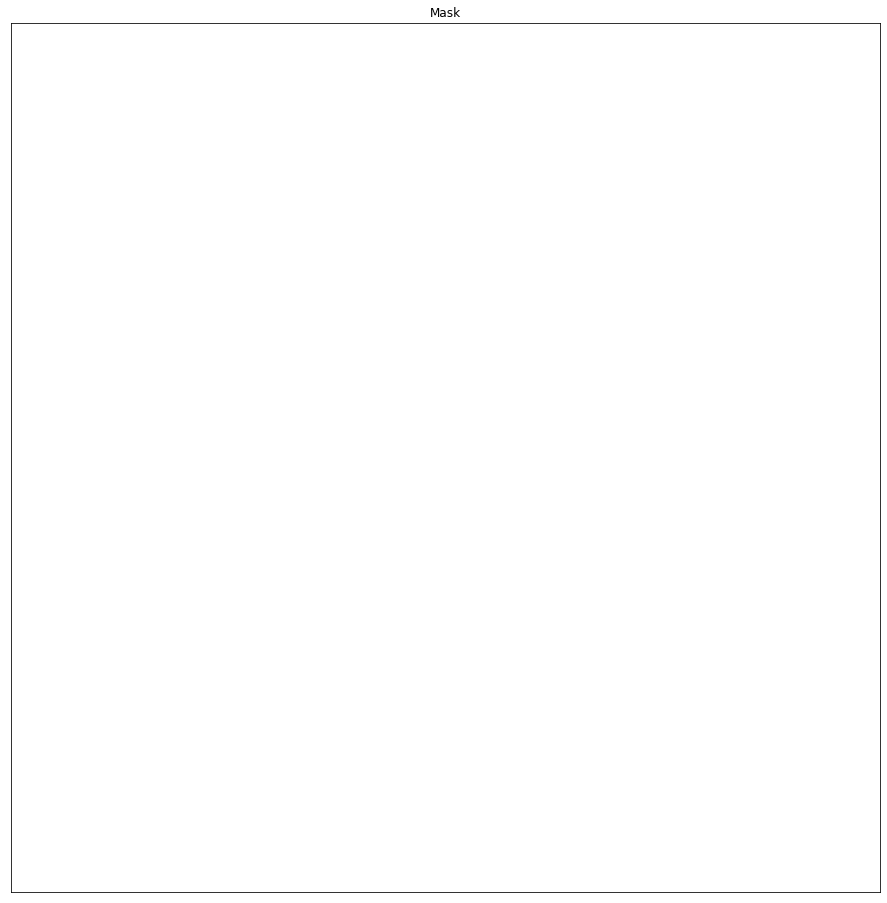

float64


In [7]:
rand_idx = random.randrange(len(image_fns))
rand_arr = joined_masks[rand_idx]
uniq(mask=joined_masks[0])

mask_vis = Image.fromarray((rand_arr).astype(np.uint8))
uniq(mask=np.array(mask_vis))
visualize(mask=mask_vis)
print(rand_arr.dtype)

## Save npy files

In [8]:
uniq(imgs=joined_imgs[0], masks=joined_masks[0])

Name: imgs, Uniques: [  0.   3.   8.  11.  12.  13.  16.  17.  18.  19.  20.  21.  22.  24.
  26.  29.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 

In [9]:
np.save(os.path.join(DATA_DIR, "images_8"), joined_imgs)
np.save(os.path.join(DATA_DIR, "masks_8"), joined_masks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 96, 96, 3) 255.0 1.0 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 

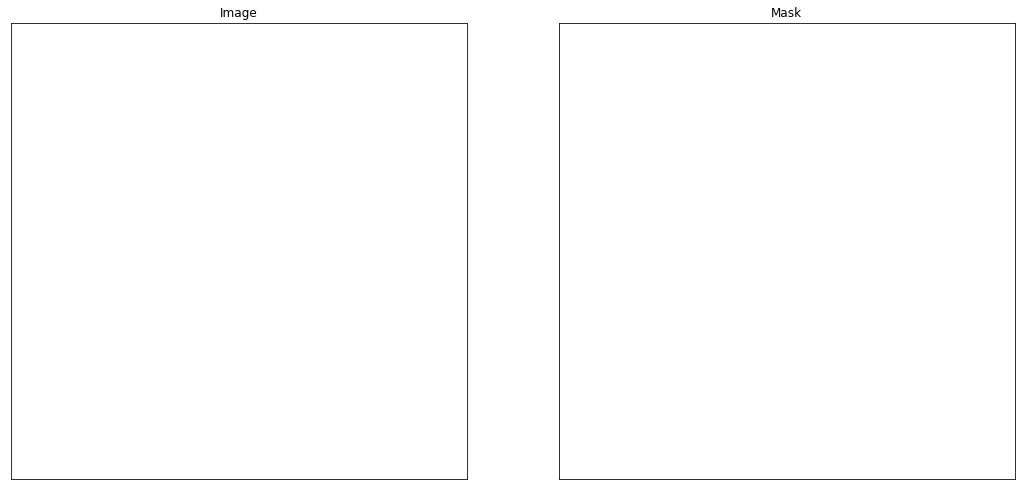

float64


In [10]:
#testing npy files
loaded_imgs = np.load(os.path.join(DATA_DIR, "images_8.npy"))
loaded_masks = np.load(os.path.join(DATA_DIR, "masks_8.npy"))
print(loaded_imgs.shape, loaded_imgs.max(), loaded_masks.max(), np.unique(loaded_imgs), np.unique(loaded_masks))
rand_idx = random.randrange(len(image_fns))
print("Index: {}".format(rand_idx))
load_img = loaded_imgs[rand_idx]
load_mask = loaded_masks[rand_idx]

visualize(image=load_img,
         mask=load_mask)
print(load_mask.dtype)